In [1]:
import pandas as pd
df = pd.read_csv('/content/uci-news-aggregator.csv')
df

,ID,TITLE,PUBLISHER,CATEGORY,STORY,HOSTNAME
0,1,"Fed official says weak data caused by weather,...",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com
1,2,Fed's Charles Plosser sees high bar for change...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com
2,3,US open: Stocks fall after Fed official hints ...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
3,4,"Fed risks falling 'behind the curve', Charles ...",IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com
...,...,...,...,...,...,...
16138,16139,All over the map: States' 'paid' Obamacare rates,CNBC.com,b,dUGqnyCCIa_a8XM3oYqtaQwB6dXJM,www.cnbc.com
16139,16140,Obama rolling back own health plan,The Robesonian,b,dUGqnyCCIa_a8XM3oYqtaQwB6dXJM,www.robesonian.com
16140,16141,Cash prizes for signing up for Obamacare?,MarketWatch,b,dUGqnyCCIa_a8XM3oYqtaQwB6dXJM,www.marketwatch.com
16141,16142,Obamacare is already making a positive Lowcoun...,Charleston Post Courier,b,dUGqnyCCIa_a8XM3oYqtaQwB6dXJM,www.postandcourier.com


In [2]:
df = df[['TITLE','CATEGORY']]
df.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [3]:
df.CATEGORY.value_counts()

e    5964
b    4824
t    3705
m    1649
Name: CATEGORY, dtype: int64

In [4]:
# Mapping dictionary
category_mapping = {'b': 'business', 't': 'science and technology', 'e': 'entertainment', 'm': 'health'}

# Function to apply the mapping
df['CATEGORY'] = df['CATEGORY'].apply(lambda x: category_mapping[x] if x in category_mapping else x)

# Filter data for specific categories
desired_categories = ['business', 'science and technology', 'entertainment', 'health']
filtered_df = df[df['CATEGORY'].isin(desired_categories)]

<ipython-input-4-63be112a6e83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORY'] = df['CATEGORY'].apply(lambda x: category_mapping[x] if x in category_mapping else x)


In [5]:
df.dropna()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business
...,...,...
16137,Columbus Dispatch Misleadingly Attacks Obamaca...,business
16138,All over the map: States' 'paid' Obamacare rates,business
16139,Obama rolling back own health plan,business
16140,Cash prizes for signing up for Obamacare?,business


In [6]:
df = df.rename(columns={'CATEGORY': 'category','TITLE':'title'})
df.head()

,title,category
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business
2,US open: Stocks fall after Fed official hints ...,business
3,"Fed risks falling 'behind the curve', Charles ...",business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,business


klo pake nltk pas running semuanya ram ga cukup

In [7]:
#import nltk
#from nltk.tokenize import RegexpTokenizer

# Download the NLTK stopwords resource
#nltk.download('stopwords')
#nltk.download('punkt')

# Set of English stopwords
#stop_words = set(nltk.corpus.stopwords.words('english'))

# Your DataFrame (replace df.title with the actual column)
#df['title'] = df['title'].astype(str)

# Tokenize the titles
#tokenizer = RegexpTokenizer(r"\w+")
#df['new_words'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))

# Filter out stopwords
#df['filtered_title'] = df['new_words'].apply(lambda tokens: [w for w in tokens if not w in stop_words])


In [8]:
#df = df[['filtered_title','category']]
#df

In [9]:
#df = df.rename(columns={'category': 'category','filtered_title':'title'})
#df.head()

In [10]:
# One-hot encoding

category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,title,business,entertainment,health,science and technology
0,"Fed official says weak data caused by weather,...",1,0,0,0
1,Fed's Charles Plosser sees high bar for change...,1,0,0,0
2,US open: Stocks fall after Fed official hints ...,1,0,0,0
3,"Fed risks falling 'behind the curve', Charles ...",1,0,0,0
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,1,0,0,0
...,...,...,...,...,...
16138,All over the map: States' 'paid' Obamacare rates,1,0,0,0
16139,Obama rolling back own health plan,1,0,0,0
16140,Cash prizes for signing up for Obamacare?,1,0,0,0
16141,Obamacare is already making a positive Lowcoun...,1,0,0,0


In [11]:
text = df_baru['title'].values
label = df_baru[['business', 'entertainment', 'health', 'science and technology']].values

In [12]:
from sklearn.model_selection import train_test_split
title_latih, title_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(title_latih)
tokenizer.fit_on_texts(title_test)

sekuens_latih = tokenizer.texts_to_sequences(title_latih)
sekuens_test = tokenizer.texts_to_sequences(title_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [14]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/10
404/404 - 24s - loss: 0.5846 - accuracy: 0.7378 - val_loss: 0.1608 - val_accuracy: 0.9452 - 24s/epoch - 59ms/step
Epoch 2/10
404/404 - 4s - loss: 0.0951 - accuracy: 0.9689 - val_loss: 0.1349 - val_accuracy: 0.9560 - 4s/epoch - 9ms/step
Epoch 3/10
404/404 - 3s - loss: 0.0516 - accuracy: 0.9831 - val_loss: 0.1552 - val_accuracy: 0.9504 - 3s/epoch - 8ms/step
Epoch 4/10
404/404 - 3s - loss: 0.0380 - accuracy: 0.9882 - val_loss: 0.1663 - val_accuracy: 0.9489 - 3s/epoch - 7ms/step
Epoch 5/10
404/404 - 3s - loss: 0.0277 - accuracy: 0.9897 - val_loss: 0.1965 - val_accuracy: 0.9474 - 3s/epoch - 6ms/step
Epoch 6/10
404/404 - 3s - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.1920 - val_accuracy: 0.9520 - 3s/epoch - 7ms/step
Epoch 7/10
404/404 - 3s - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.2273 - val_accuracy: 0.9501 - 3s/epoch - 8ms/step
Epoch 8/10
404/404 - 2s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.2145 - val_accuracy: 0.9511 - 2s/epoch - 6ms/step
Epoch 9/10
404/404 - 

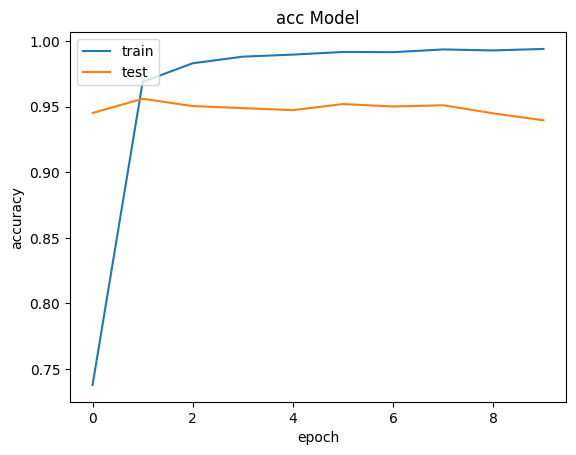

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('acc Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

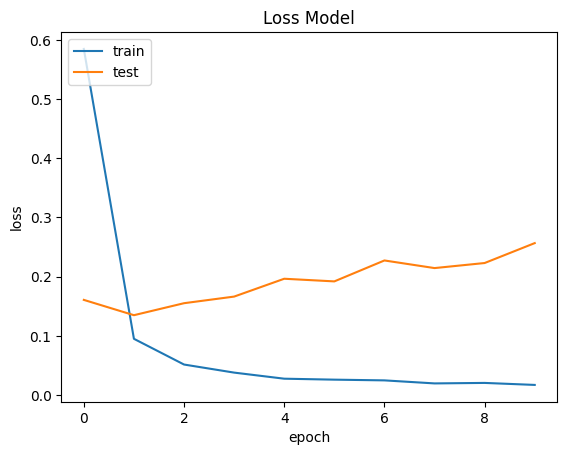

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Melihat akurasi pada data pelatihan
train_accuracy = history.history['accuracy']
print(f'Training Accuracy: {train_accuracy[-1]}')

# Melihat akurasi pada data validasi
val_accuracy = history.history['val_accuracy']
print(f'Validation Accuracy: {val_accuracy[-1]}')

Training Accuracy: 0.9940374493598938
Validation Accuracy: 0.9396097660064697
